TrainData Dimensions: X: (490, 1) Y: (490, 1) 
TestData Dimensions: X: (209, 1) Y: (209, 1) 

Iteration: 1, Loss: 4593.297088093158


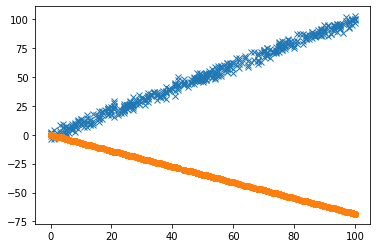

Iteration: 2, Loss: 2103.007951623449


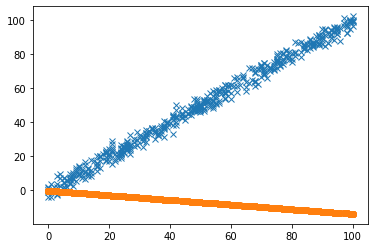

Iteration: 3, Loss: 963.9982887552593


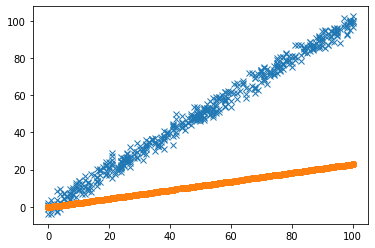

Iteration: 4, Loss: 443.0374922244874


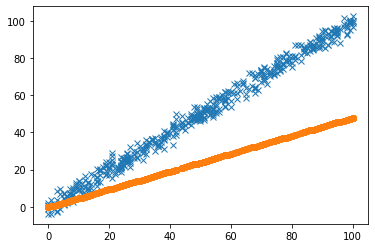

Iteration: 5, Loss: 204.76018837112508


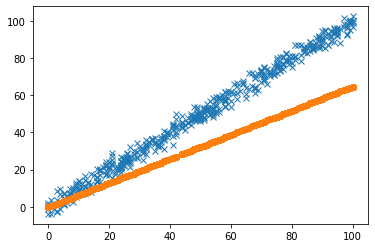

Iteration: 6, Loss: 95.77679861528152


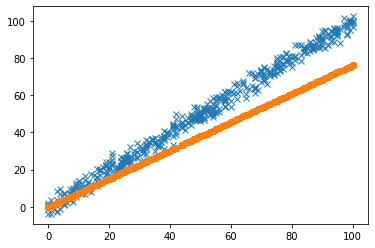

Iteration: 7, Loss: 45.92992250699515


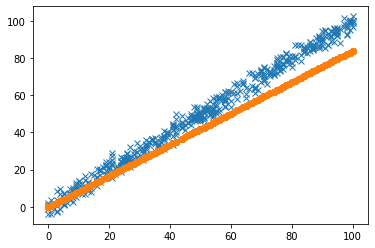

Iteration: 8, Loss: 23.130933925341132


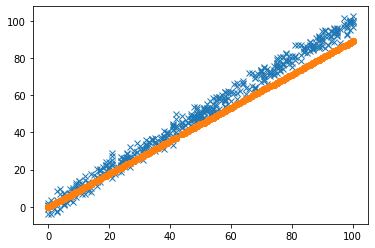

Iteration: 9, Loss: 12.703121365552647


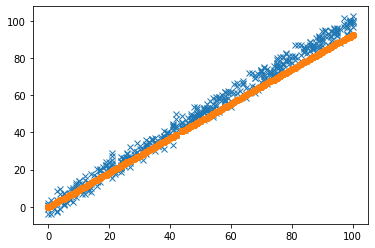

Iteration: 10, Loss: 7.933643343472328


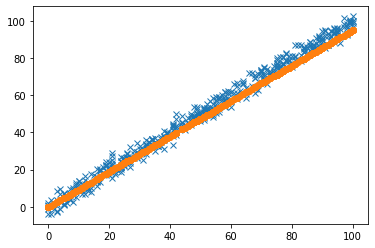

Model performance on test data 
Cost: 2.3764665773089524


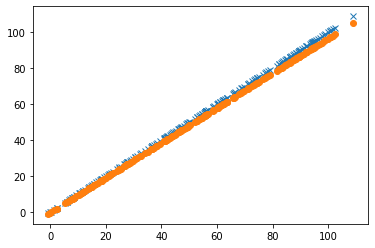

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Download the dataset from Kaggle
#https://www.kaggle.com/andonians/random-linear-regression/data
file_path = r'C:\Users\User\Downloads\archive\train.csv'

#Read the dataset
data = pd.read_csv(file_path)

#Clean dataset for null values(if any)
data = data.dropna()

#Set Hyperparameter values
iterations = 10
learning_rate = 0.0001

#Split the dataset into train and test sets
test_ratio = 0.3
split_index = data.shape[0] - int(data.shape[0] * test_ratio)

train_data = np.array(data.x[0:split_index]).reshape(split_index, 1)
train_labels = np.array(data.y[0:split_index]).reshape(split_index, 1)

test_data = np.array(data.y[split_index:]).reshape(data.shape[0] - split_index, 1)
test_labels = np.array(data.y[split_index:]).reshape(data.shape[0] - split_index, 1)

print("TrainData Dimensions: X: {} Y: {} \nTestData Dimensions: X: {} Y: {} \n"
      .format(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape))

#Random initializations
weight = np.random.uniform(0, 1) * -1
bias = np.random.uniform(0, 1) * -1
plt.figure()

#Training
for iteration in range(iterations):
    
    #Forward propagation
    predictions = np.multiply(weight, train_data) + bias
    
    #CostFunction(MSE: Mean Squared Error)
    cost = np.mean((train_labels - predictions) ** 2) * 0.5
    print("Iteration: {}, Loss: {}".format(iteration+1, cost))
    
    #Plot the current status
    plt.plot(train_data, train_labels, 'x')
    plt.plot(train_data, predictions, 'o')
    plt.show()
    
    #Gradient Descent for back propagation
    cost_derivative = (train_labels - predictions) * -1
    derivative_wrt_weight = np.mean(np.multiply(train_data, cost_derivative))
    derivative_wrt_bias = np.mean(cost_derivative)
    
    #Update weight & bias parameters
    weight = weight - learning_rate * derivative_wrt_weight
    bias = bias - learning_rate * derivative_wrt_bias

#Testing
test_predictions = test_data * weight + bias
cost_test = np.mean((test_labels - test_predictions) ** 2) * 0.5
print("Model performance on test data \nCost: {}".format(cost_test))

plt.figure()
plt.plot(test_data, test_labels, 'x')
plt.plot(test_data, test_predictions, 'o')
plt.show()